# Liver disease Prediction


## Description About The Disease

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

## About Data

(1.)age - Age of the patient
(2.)gender - Gender of the patient
(3.)tot_bilirubin - Total Bilirubin
(4.)direct_bilirubin - Direct Bilirubin
(5.)alkphos - Alkaline Phosphotase
(6.)sgpt - Alamine Aminotransferase
(7.)sgot - Aspartate Aminotransferase
(8.)tot_proteins - Total Protiens
(9.)albumin - Albumin
(10.)ag_ratio - Albumin and Globulin Ratio
(11.)is_patient - Selector field used to split the data into two sets (labeled by the experts)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('indian_liver_patient.csv')

## Data Cleaning

In [3]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [4]:
dataset_2 = dataset.dropna()

In [5]:
dataset_2.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

## Encoding Data

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset_2['Male'] = le.fit_transform(dataset_2['Gender'])

C:\Users\Harsh\AppData\Local\Temp\ipykernel_69596\1854201896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2['Male'] = le.fit_transform(dataset_2['Gender'])


## Data Preprocessing

In [7]:
dataset_3 = dataset_2.drop('Gender',axis = 'columns')
dataset_3.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


In [8]:
dataset_3['Dataset'] = dataset_3['Dataset'] - 1 

In [9]:
X = dataset_3.drop('Dataset' , axis = 'columns')
y = dataset_3.iloc[:,-2]

In [10]:
from sklearn import preprocessing
X_scaler = preprocessing.normalize(X)

## Data Visualization

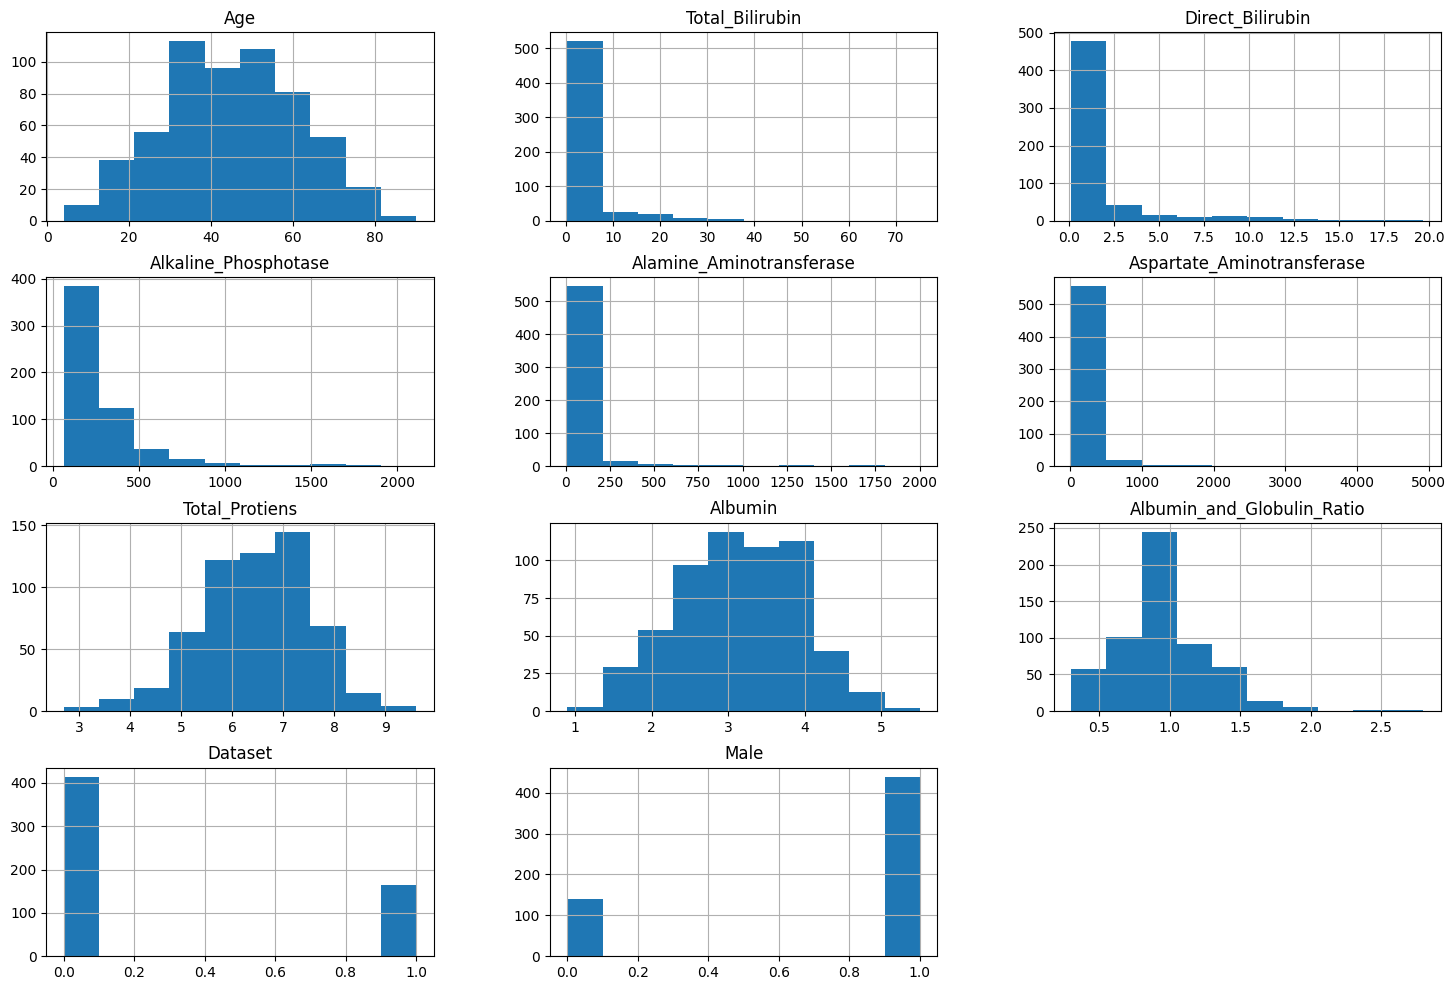

In [11]:
dataset_3.hist(figsize=(18,12))
plt.show()

## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, random_state = 0)

In [13]:
print(X_train[:5])

[[6.07734955e-02 2.29799780e-02 1.13950304e-02 9.78073444e-01
  9.11602433e-02 1.74723800e-01 1.25345335e-02 4.55801217e-03
  9.49585868e-04 1.89917174e-03]
 [2.18112183e-01 3.44387657e-03 5.73979428e-04 9.47066057e-01
  1.26275474e-01 1.95153006e-01 3.38647863e-02 1.66454034e-02
  5.16581486e-03 0.00000000e+00]
 [2.37725599e-01 4.02304860e-03 1.09719507e-03 9.43587763e-01
  1.75551212e-01 1.46292677e-01 2.56012184e-02 1.42635360e-02
  4.38878030e-03 3.65731691e-03]
 [3.80767044e-01 4.41469037e-03 1.10367259e-03 8.05680992e-01
  2.31771244e-01 3.86285407e-01 4.63542489e-02 2.70399785e-02
  7.72570815e-03 0.00000000e+00]
 [9.58703275e-02 4.01235074e-02 2.02392914e-02 9.90660051e-01
  5.32612930e-02 6.56889281e-02 1.38479362e-02 6.03627988e-03
  1.42030115e-03 0.00000000e+00]]


In [14]:
print(y[:10])

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    0
Name: Dataset, dtype: int64


C:\Users\Harsh\AppData\Local\Temp\ipykernel_69596\53084020.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y[:10])


## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
print(X_train[:5])

[[-1.19691375  0.68560368  0.7992634   0.58255501 -0.68478469 -0.33087425
  -1.12748459 -1.21731252 -1.24660614 -0.45651999]
 [ 0.39072851 -0.36684603 -0.450794    0.38988123 -0.4289317  -0.22619878
   0.6692244   0.56253532  0.47860524 -1.2917265 ]
 [ 0.58863972 -0.33564485 -0.39035166  0.3682678  -0.06990388 -0.47655006
  -0.02683986  0.21180938  0.16065551  0.31666668]
 [ 2.03201418 -0.31454631 -0.38960337 -0.48865767  0.33972074  0.75312825
   1.72124802  2.09311885  1.52607136 -1.2917265 ]
 [-0.84276555  1.60916065  1.82096026  0.6607657  -0.96092012 -0.88954874
  -1.01685287 -0.99964011 -1.05399721 -1.2917265 ]]


In [17]:
print(X.shape)

(579, 10)


## Training Logistic Regression Model on Training Dataset

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Creating Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : - ')
print(cm)

Confusion Matrix : - 
[[94 10]
 [31 10]]


## Computing Accuracy with K-cross fold validation

In [22]:
from sklearn.model_selection import cross_val_score
accuracy2 = cross_val_score(estimator = classifier ,X = X_train ,y = y_train , cv = 10)
print("Training Score = " + f"{accuracy2.mean()*100}")
print("Standard Deviation = " + f"{accuracy2.std()*100}")

Training Score = 69.8414376321353
Standard Deviation = 6.739644696310501


In [23]:
from sklearn.metrics import accuracy_score
print("Acurracy =",accuracy_score(y_test,y_pred)*100 , '%')

Acurracy = 71.72413793103448 %


## Storing The Data

In [24]:
import pickle

In [25]:
with open('liver_prediction.sav', 'wb') as files:
    pickle.dump(classifier, files)

In [26]:
with open('liver_prediction.sav', 'rb') as f:
    new_model = pickle.load(f)

In [27]:
predict_data = (65,0,0.7,0.1,187,16,18,6.8,3.3,0.9)

predict_data_arr= np.asarray(predict_data).reshape(1,-1)


prediction = new_model.predict(predict_data_arr)
print(prediction)

if (prediction[0] == 0):
  print('The person doesnot have Liver Disease')
else:
  print('The person have Liver Disease')

[0]
The person doesnot have Liver Disease


Dataset Resource - Kaggle.com